# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по нему было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

## Загрузка данных

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [18]:
# получим датасет
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('C:/Users/fokin/OneDrive/Рабочий стол/Дата Сайнс/Линейная алгебра/Проект/insurance.csv')

Набор данных находится в файле /datasets/insurance.csv. 
   1. Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
   2. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Входной датасет не менялся из предположения корректности подобного представления данных.

In [19]:
# откроем и рассмотрим датасет
display(data.info())
display(data.describe())
display(data.head(10))
display(data.tail(10))
display(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4990,0,22.0,56800.0,1,0
4991,0,21.0,38300.0,3,0
4992,0,45.0,54600.0,0,1
4993,1,32.0,36000.0,1,0
4994,1,26.0,51400.0,0,0
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

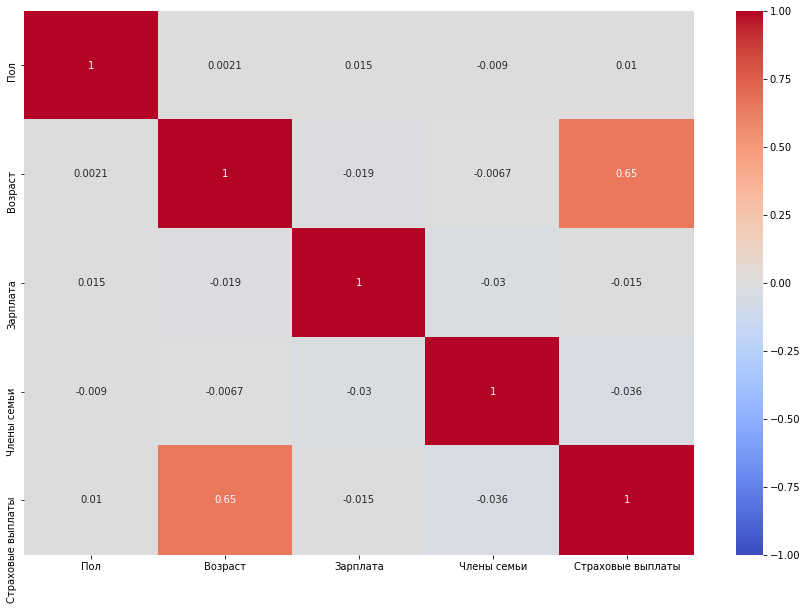

In [20]:
# построим хитмэп для наглядного отображения корреляций
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

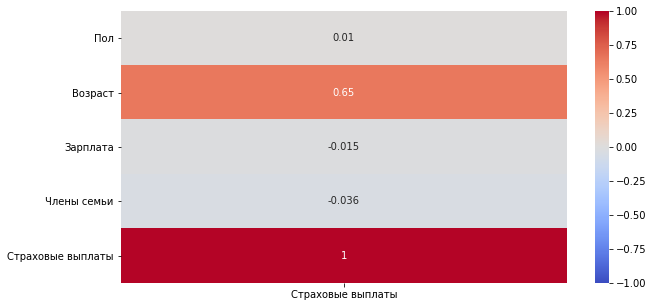

In [21]:
# построим хитмэп по целевому признаку и выявим корреляции
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()[['Страховые выплаты']], vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

### Вывод

По итогам предварительного рассмотрения и анализа датасета выявлено:
1. Наименования признаков и цифровые данные по ним отражены корректно;
2. Доля мужчин составляет порядка 50%, доля женщин имеет аналогичный процент, можно сказать, что подобная выборка на первый взгляд была взята как идеальная/неправдоподобная в части данного признака,
3. Средний возраст и медиана практически идентичны друг другу и составляют 30-31 год, минимальный возраст 18 лет, максимальный возраст 65 лет,
4. Медианная и средняя зарплаты составляют около 40 тыс. руб., минимальная - 5 тыс. руб.(вероятно, здесь необходимо получение дополнительной информации, либо были учтены какие-либо совместители и т.п., т.к. МРОТ выше), максимальная зарплата составляет 79 тыс. руб.(это может говорить о подавляющей региональной составляющей признака),
5. Количество членов семьи 0 говорит о том, что заемщик один, а максимальное количество составляет 6,
6. В части страховых выплат(является целевым признаком) следует отметить наибольшую связь с признаком Возраст(выше возраст - выше риски для страховой при страховании индивида и необходимость повышения коэффициента для минимизации собственных структурных рисков организации), корреляция положительная и составляет 0.65, т.е. достаточно сильная. Однако корреляция не достаточно сильная, чтобы говорить об утечке признака.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Справка по формуле:
1. Транспонированная матрица признаков $(X^T)$ умножается на себя $(X)$;
2. Вычисляется обратная к результату матрица $((X^T X)^{-1})$;
3. Обратная умножается на транспонированную матрицу признаков $(*X^T)$;
4. Результат умножается на вектор значений целевого признака $(*y)$.

**Ответим на некоторые вопросы и обоснуем решение.**

**Вопрос:** признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

    a. Изменится. Приведем примеры матриц.

    b. Не изменится. Укажем, как связаны параметры линейной регрессии в  исходной задаче и в преобразованной.

**Ответ:** 
    
    Качество линейной регрессии не изменится при умножении на обратимую матрицу имеющихся признаков исходя из вводных условий выше.

**Обоснование:** 
    
    Признаки $X$ умножают на обратимую матрицу $P$, соответственно $X_1 = XP$. Преобразуем матрицу подставив обратную матрицу и сократив: 
$$
a = XP(((XP)^T XP)^{-1} (XP)^T y)
$$

$$
a = XP(X^{T}P^{T}XP)^{-1}X^{T}P^{T}y
$$

$$
a = XP(X^{T}X)^{-1}(P^{T})^{-1}P^{-1}X^{T}P^{T}y
$$

$$
a = XPP^{-1}(X^{T}X)^{-1}P^{-T}X^{T}P^{T}y
$$

$$
a = XP^{-1}(X^{T}X)^{-1}X^{T}y
$$

$$
a = Xw
$$

## Алгоритм преобразования

Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.

**Алгоритм**

1. Возьмем алгоритм линейной регрессии,
2. Подготовим данные создав обучающую и тестовую выборки,
3. Обучим модель и вычислим метрику R2,
4. Повторим действия начиная с п.1 только для скорректированной матрицы с учетом обратимой и вычислив метрику R2 сравним с регрессией до преобразования.

**Обоснование**

Согласно выведенному обоснованию выше качество линейной регрессии не изменится.

## Проверка алгоритма

Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [22]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

print('Метрика R2 на тестовой выборке в базовой модели:', r2_score(target_valid, predictions_valid))

Метрика R2 на тестовой выборке в базовой модели: 0.435227571270266


In [23]:
def adjusted_matrix(features_train, features_valid):
    random_matrix = np.random.normal(size=(features_train.shape[1], features_train.shape[1]))
    adjusted_matrix_train = features_train.values @ random_matrix
    adjusted_matrix_valid = features_valid.values @ random_matrix
    return adjusted_matrix_train, adjusted_matrix_valid

features_train_adjusted, features_valid_adjusted = adjusted_matrix(features_train, features_valid)

model = LinearRegression()
model.fit(features_train_adjusted, target_train)
predictions_valid_adjusted = model.predict(features_valid_adjusted)

print('Метрика R2 на тестовой выборке в модели с зашифрованными данными:', r2_score(target_valid, predictions_valid_adjusted))

Метрика R2 на тестовой выборке в модели с зашифрованными данными: 0.4352275712702216


### Вывод

Действительно, при умножении матрицы на обратимую качество модели линейной регрессии практически не изменится, поэтому коэффициент R2 подтверждает идентичность в обоих случаях.